# SW 13

In [3]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

anti = pd.DataFrame({
'Anzahl': np.tile([-1,1],8),
'VolPrs': np.tile(np.repeat([-1,1],[2,2]),4),
'Zeit': np.tile(np.repeat([-1,1],[4,4]),2),
'RadDos': np.repeat([-1,1],[8,8]),
'Entw': [-1,1,1,-1, 1,-1,-1,1, -1,1,1,-1, 1,-1,-1,1], 
'Inj2': [-1,-1,1,1, 1,1,-1,-1, 1,1,-1,-1, -1,-1,1,1] 
}, dtype='category')

anti['Yy'] = np.array([70,150,34,32,137.5,56,123,225,50,2.7,1.2,12,90,2.1,4,15])
fit = ols('Yy ~ C(Anzahl, Sum) + C(VolPrs, Sum) + C(Zeit, Sum) + C(RadDos, Sum) + C(Entw, Sum) + C(Inj2, Sum)', data=anti).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(Anzahl, Sum)",1.0,13.875625,13.875625,0.006492,0.937543
"C(VolPrs, Sum)",1.0,785.400625,785.400625,0.367488,0.559354
"C(Zeit, Sum)",1.0,5651.280625,5651.280625,2.644229,0.138371
"C(RadDos, Sum)",1.0,26446.890625,26446.890625,12.374474,0.006539
"C(Entw, Sum)",1.0,5863.730625,5863.730625,2.743634,0.132024
"C(Inj2, Sum)",1.0,7314.525625,7314.525625,3.422459,0.097353
Residual,9.0,19234.920625,2137.213403,NaN,NaN


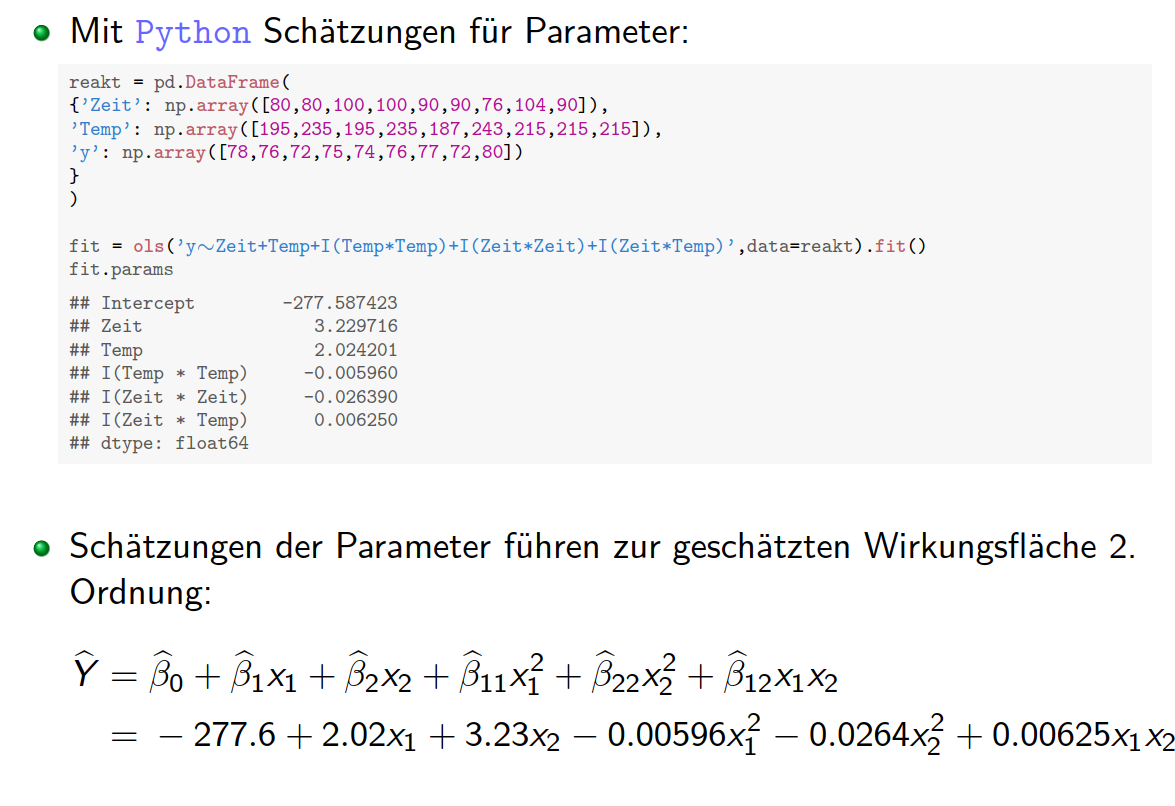

In [2]:
reakt = pd.DataFrame(
{'Zeit': np.array([80,80,100,100,90,90,76,104,90]), 
 'Temp': np.array([195,235,195,235,187,243,215,215,215]), 
 'y': np.array([78,76,72,75,74,76,77,72,80])
}
)

fit = ols('y ~ Zeit + Temp + I(Temp*Temp) + I(Zeit*Zeit) + I(Zeit*Temp)', data=reakt).fit() 
fit.params

Intercept        -277.587423
Zeit                3.229716
Temp                2.024201
I(Temp * Temp)     -0.005960
I(Zeit * Zeit)     -0.026390
I(Zeit * Temp)      0.006250
dtype: float64